# Question 2 - Monte Carlo Comparison [40 points]

In this question I will use my functions from problem set 1, question 3 for construcing binomial confidence intervals for a population proprotion in a Monte Carlo study comparing the performance of the programmed methods.

In the instructions that follow, let n refer to sample size and p to the population proportion to be estimated.

I choose a nominal confidence level of 95% to use for all parts below.

In [1]:
import numpy as np
import pandas as pd
import random
import math
from scipy.stats import norm, binom, beta
import matplotlib.cm as cm
import matplotlib.pyplot as plt

/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from STATS507_Q2_supplement import ci_mean, ci_prop

## part a) Level Calibration

In this part, you will examine whether the nominal confidence level is achieved by each method over a grid of values for n and p. Recall that the confidence level is the proportion of intervals that (nominally should) contain the true population proportion.

Pick a sequence of values to examine for $p∈(0,0.5]$ or $p∈[0.5,1)$ and a sequence of values for n>0. For each combination of n and p use Monte Carlo simulation to estimate the actual confidence level each method for generating intervals achieves. Choose the number of Monte Carlo replications so that, if the nominal level were achieved, the margin of error around your Monte Carlo estimate of the confidence level would be no larger than 0.005.

For each confidence interval method, construct a contour plot (with axes n and p) showing the estimated confidence level. Use subplots to collect these into a single figure.



In [3]:
def n_MC(p, level=0.95):
    """
    Calculate the number of Monte Carlo simulation. 

    Parameters
    ----------
    p : float
        p is the population proportion to be estimated.
    level : float
        It is the significance level. We set it as 0.95.
 
    Returns
    -------
    A integer. It is the number of Monte Carlo simulation given by p. 
    """
    
    phi = norm.ppf(1 - (1 - level) / 2)
    simulations = math.ceil((phi*((p*(1-p))**0.5)/0.005)**2)
    return simulations

In [4]:
# First we select n = [100, 500, 1000, 1500, 2000], p = [0.6, 0.7, 0.8, 0.9]
n = [100, 500, 1000, 1500, 2000]
p = [0.6, 0.7, 0.8, 0.9]
# Accuracy of Monte Carlo estimation whether p is within the estimated CI
Acc_bin = [[0]*len(n) for i in range(len(p))]
Acc_normal = [[0]*len(n) for i in range(len(p))]
Acc_CP = [[0]*len(n) for i in range(len(p))]
Acc_Jeffrey = [[0]*len(n) for i in range(len(p))]
Acc_AC = [[0]*len(n) for i in range(len(p))]
# Set CP method as a reference, calculate the ralative CI width of other methods
width_bin = [[0]*len(n) for i in range(len(p))]
width_normal = [[0]*len(n) for i in range(len(p))]
width_CP = [[0]*len(n) for i in range(len(p))]
width_Jeffrey = [[0]*len(n) for i in range(len(p))]
width_AC = [[0]*len(n) for i in range(len(p))]
# Start the Monte Carlo simulation experiment.
for j in range(len(p)):
    for i in range(len(n)):
        for MC in range(n_MC(p[j])):
            # generate data obeying binomial distribution
            gen_x = np.random.binomial(1, p[j], size = n[i])
            # get five dictionary output of 5 different methods
            dict_bin = ci_mean(x=gen_x, level=0.95, str_fmt=None)
            dict_normal = ci_prop(x=gen_x, level=0.95, method="Normal", str_fmt=None)
            dict_CP = ci_prop(x=gen_x, level=0.95, method="CP", str_fmt=None)
            dict_Jeffrey = ci_prop(x=gen_x, level=0.95, method="Jeffrey", str_fmt=None)
            dict_AC = ci_prop(x=gen_x, level=0.95, method="AC", str_fmt=None)
            # judge whether p in within the CI
            if (p[j]>dict_bin.get("lwr")) and (p[j]<dict_bin.get("upr")):
                Acc_bin[j][i] += 1
            if (p[j]>dict_normal.get("lwr")) and (p[j]<dict_normal.get("upr")):
                Acc_normal[j][i] += 1
            if (p[j]>dict_CP.get("lwr")) and (p[j]<dict_CP.get("upr")):
                Acc_CP[j][i] += 1
            if (p[j]>dict_Jeffrey.get("lwr")) and (p[j]<dict_Jeffrey.get("upr")):
                Acc_Jeffrey[j][i] += 1
            if (p[j]>dict_AC.get("lwr")) and (p[j]<dict_AC.get("upr")):
                Acc_AC[j][i] += 1
            # calculate the CI width
            widthbin = dict_bin.get("upr")-dict_bin.get("lwr")
            widthnormal = dict_normal.get("upr")-dict_normal.get("lwr")
            widthCP = dict_CP.get("upr")-dict_CP.get("lwr")
            widthJeffrey = dict_Jeffrey.get("upr")-dict_Jeffrey.get("lwr")
            widthAC = dict_AC.get("upr")-dict_AC.get("lwr")
            # calculate sum of the CI width
            width_bin[j][i] += widthbin
            width_normal[j][i] += widthnormal
            width_CP[j][i] += widthCP
            width_Jeffrey[j][i] += widthJeffrey
            width_AC[j][i] += widthAC
        # calculate the mean of accuracy    
        Acc_bin[j][i] = Acc_bin[j][i]/(n_MC(p[j]))
        Acc_normal[j][i] = Acc_normal[j][i]/(n_MC(p[j]))
        Acc_CP[j][i] = Acc_CP[j][i]/(n_MC(p[j]))
        Acc_Jeffrey[j][i] = Acc_Jeffrey[j][i]/(n_MC(p[j]))
        Acc_AC[j][i] = Acc_AC[j][i]/(n_MC(p[j]))
        # Set CP method as a reference
        width_CP[j][i] = width_CP[j][i]/(n_MC(p[j]))
        # and estimate the average relative width of other methods
        width_bin[j][i] = width_bin[j][i]/(n_MC(p[j]))/width_CP[j][i]
        width_normal[j][i] = width_normal[j][i]/(n_MC(p[j]))/width_CP[j][i]
        width_Jeffrey[j][i] = width_Jeffrey[j][i]/(n_MC(p[j]))/width_CP[j][i]
        width_AC[j][i] = width_AC[j][i]/(n_MC(p[j]))/width_CP[j][i]

/Users/ShuyanLi/Desktop/Umich_lsy/STATS507/HW4/STATS507_Q2_supplement.py:149: Warning: Normal approximation may be incorrect for n * min(p, 1-p) < 12.
  "Normal approximation may be incorrect for n * min(p, 1-p) < 12."


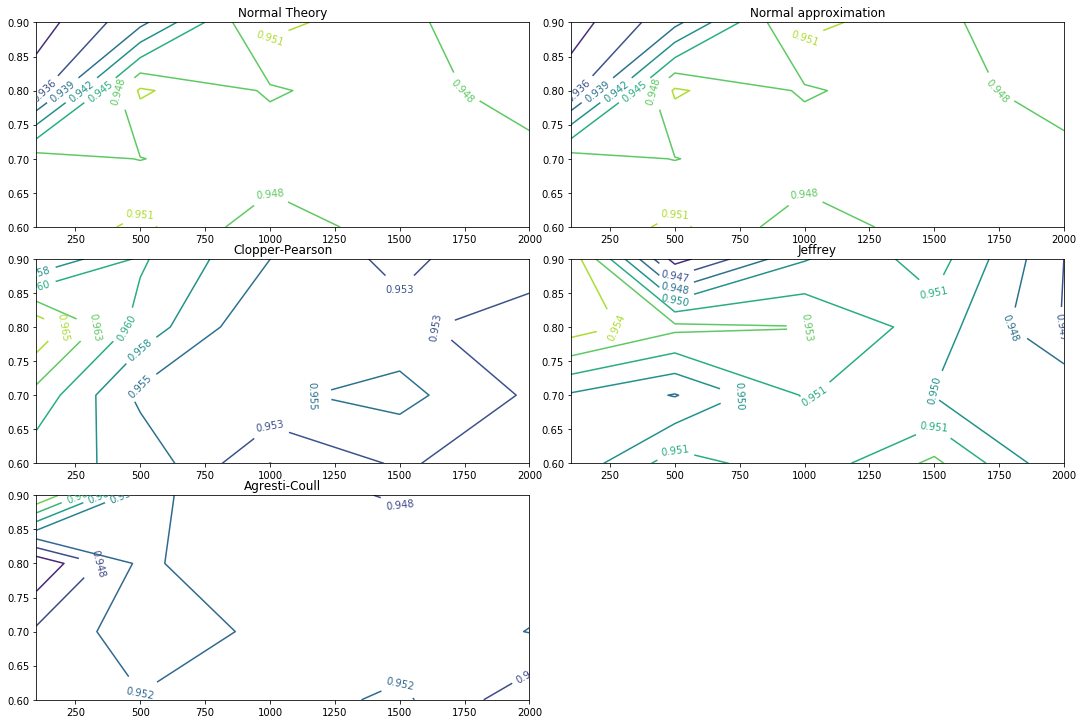

In [5]:
# draw contour image
X, Y = np.meshgrid(np.array(n), np.array(p))
Z_acc_bin = np.array(Acc_bin)
Z_acc_normal = np.array(Acc_normal)
Z_acc_CP = np.array(Acc_CP)
Z_acc_Jeffrey = np.array(Acc_Jeffrey)
Z_acc_AC = np.array(Acc_AC)

fig0 = plt.figure(figsize=(15,10))
ax0 = fig0.add_subplot(3, 2, 1)
ax1 = fig0.add_subplot(3, 2, 2)
ax2 = fig0.add_subplot(3, 2, 3)
ax3 = fig0.add_subplot(3, 2, 4)
ax4 = fig0.add_subplot(3, 2, 5)
fig0.tight_layout() 

_ = ax0.clabel(ax0.contour(X, Y, Z_acc_bin), inline=True, fontsize=10)
_ = ax0.set_title('Normal Theory')

_ = ax1.clabel(ax1.contour(X, Y, Z_acc_normal), inline=True, fontsize=10)
_ = ax1.set_title('Normal approximation')

_ = ax2.clabel(ax2.contour(X, Y, Z_acc_CP), inline=True, fontsize=10)
_ = ax2.set_title('Clopper-Pearson')

_ = ax3.clabel(ax3.contour(X, Y, Z_acc_Jeffrey), inline=True, fontsize=10)
_ = ax3.set_title('Jeffrey')

_ = ax4.clabel(ax4.contour(X, Y, Z_acc_AC), inline=True, fontsize=10)
_ = ax4.set_title('Agresti-Coull')


### part b) Relative Efficiency

As part of your simulation for part a, record the widths of the associated confidence intervals. Estimate the average width of intervals produced by each method at each level of n and p and use a collection of contour plots to visualize the results. Finally, using the Clopper-Pearson method as a reference, estimate the average relative width (at each value of n and p) and display these results using one more countour plots.

We have done this process along with calculating the level calibration in part a. Then we will just display the contour plots of average relative width using the Clopper-Pearson method as a reference.

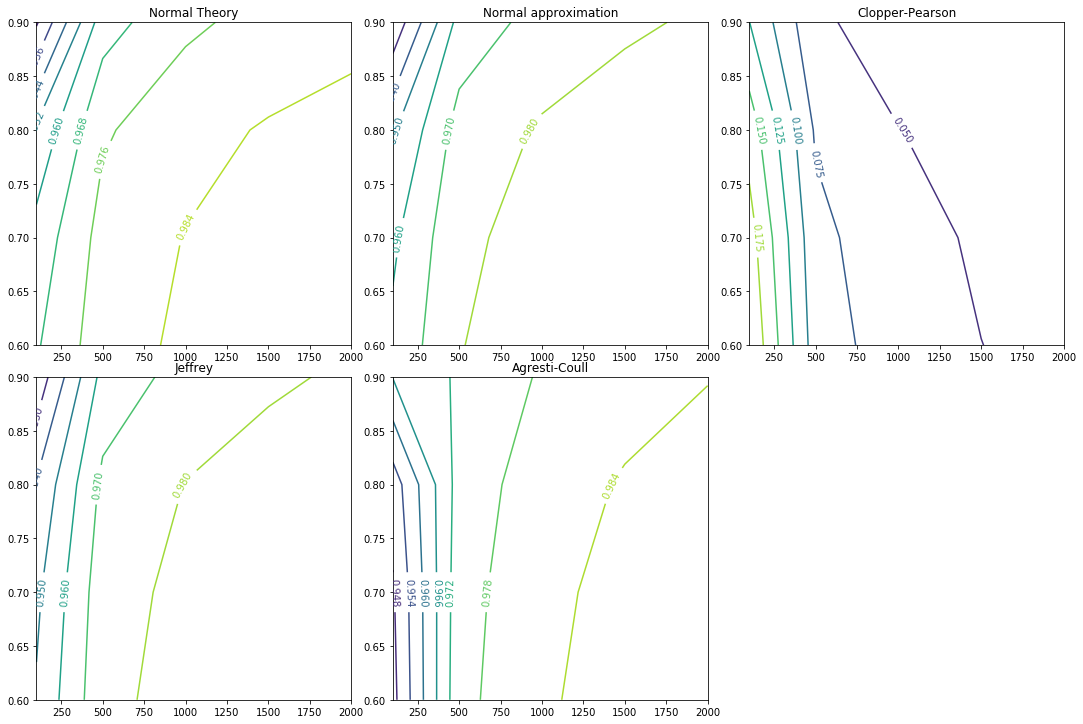

In [6]:
# draw contour image
X, Y = np.meshgrid(np.array(n), np.array(p))
Z_width_bin = np.array(width_bin)
Z_width_normal = np.array(width_normal)
Z_width_CP = np.array(width_CP)
Z_width_Jeffrey = np.array(width_Jeffrey)
Z_width_AC = np.array(width_AC)

fig1 = plt.figure(figsize=(15,10))
ax0 = fig1.add_subplot(2, 3, 1)
ax1 = fig1.add_subplot(2, 3, 2)
ax2 = fig1.add_subplot(2, 3, 3)
ax3 = fig1.add_subplot(2, 3, 4)
ax4 = fig1.add_subplot(2, 3, 5)
fig1.tight_layout() 

_ = ax0.clabel(ax0.contour(X, Y, Z_width_bin), inline=True, fontsize=10)
_ = ax0.set_title('Normal Theory')

_ = ax1.clabel(ax1.contour(X, Y, Z_width_normal), inline=True, fontsize=10)
_ = ax1.set_title('Normal approximation')

_ = ax2.clabel(ax2.contour(X, Y, Z_width_CP), inline=True, fontsize=10)
_ = ax2.set_title('Clopper-Pearson')

_ = ax3.clabel(ax3.contour(X, Y, Z_width_Jeffrey), inline=True, fontsize=10)
_ = ax3.set_title('Jeffrey')

_ = ax4.clabel(ax4.contour(X, Y, Z_width_AC), inline=True, fontsize=10)
_ = ax4.set_title('Agresti-Coull')